<a href="https://colab.research.google.com/github/vishal5212/HTML-DOM-document-object/blob/master/python_udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **tuple unpacking**

In [0]:
a=[(1,2),(3,4),(5,6)]

In [0]:
for a,b in a:
  print(a)

1
3
5


**yield vs return**

The yield statement suspends function’s execution and sends a value back to caller, but retains enough state to enable function to resume where it is left off. When resumed, the function continues execution immediately after the last yield run. This allows its code to produce a series of values over time, rather them computing them at once and sending them back like a list.



---



# LOGISTIC REGRESSION

**while importing iris dataset form sklearn it failed. Here's what stackoverflow has to say**

#wrong way 
import sklearn

iris = sklearn.datasets.load_iris()
#right way
from sklearn import datasets

iris= datasets.load_iris()

or

iris= sklearn.datasets.load_iris()


**reason**

when you import a package, only variables/functions/classes in the __init__.py file of that package are directly visible, not sub-packages or modules.

datasets is a sub-package of sklearn

**by doing from sklearn import datasets it is automatically added to the namespace of the package sklearn. This is one of the lesser-known "traps" of the Python import system.**

In [0]:
import sklearn
iris= sklearn.datasets.load_iris()

AttributeError: ignored

In [0]:
from sklearn import datasets
iris = datasets.load_iris()

In [0]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

**Given a set of inputs X, we want to assign them to one of two possible categories (0 or 1). Logistic regression models the probability that each input belongs to a particular category.**

**to generate the probability values lr uses sigmoid which outputs the value between 0 and 1**

In [7]:
X[1]

array([4.9, 3. ])

In [10]:
X.size

300

In [11]:
X.shape

(150, 2)

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
y.shape

(150,)

In [15]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

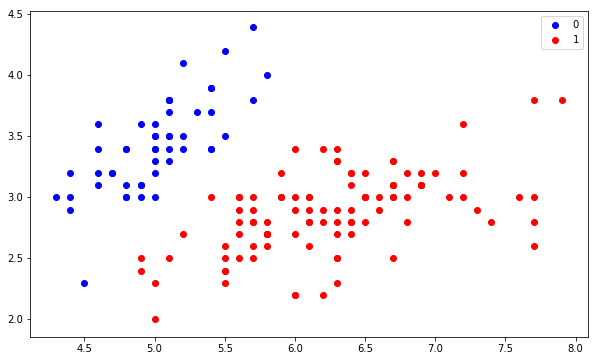

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:,1],color = 'r', label = '1')
plt.legend()

In [0]:
class LogisticRegression:
  def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
    self.lr=lr
    self.num_iter=num_iter
    self.fit_intercept = fit_intercept
    self.verbose = verbose
    
  def __add_intercept(self, X):
    intercept = np.ones((X.shape[0],1))
    return np.concatenate((intercept, X), axis=1)
  
  def __sigmoid(self, z):
    return 1/(1+np.exp(-z))
  
  def __loss(self, h, y):
    return (-y*np.log(h)-(1-y)*log(1-h)).mean()
  
  def fit(self, X, y):
    if self.fit_intercept:
      X=self.__add_intercept(X)
      
      # weights initialization
      self.theta = np.zeros(X.shape[1])
      
      for i in range(self.num_iter):
        z=np.dot(X, self.theta)
        h = self.__sigmoid(z)
        gradient = np.dot(X.T, (h-y)) / y.size
        self.theta -= self.lr * gradient
        
        z=np.dot(X, self.theta)
        h = self.__sigmoid(z)
        loss = self.__loss(h,y)
        
        if(self.verbose == True and i%10000 ==0):
          print(f'loss:{loss}\t')
          
    def predict_prob(self, X):
      if self.fit_intercept:
        X - self.__add_intercept(X)
        
      return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
      return self.predict_prob(X),round()

# appending a list

In [3]:
list = ['a','b','c']
list.append('d')
list

['a', 'b', 'c', 'd']

In [0]:
something = ['e','f']
list.append(something)

In [5]:
list

['a', 'b', 'c', 'd', ['e', 'f']]